<a href="https://colab.research.google.com/github/Shruti123V-github/Shruti-Vedpathak/blob/master/Exploratory_data_analysis_of_cars_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1 -

1.1 Importing Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


1.2 Loading Data In The Data Frame

In [4]:
df=pd.read_csv('/content/data.csv')


In [5]:
df.head(5) #display top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.tail(5) #display bottom 5 rows


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


1.3 Checking the data types and summary stats

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# **STEP 2** -

Dropping irrelevant data

In [9]:
df=df.drop(['Number of Doors','Market Category','Engine Fuel Type'],axis = 1)
df.head(5)


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **STEP 3** -

Renaming the columns

In [25]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [26]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# STEP 4 -

4.1 Checking and Dropping duplicates in data

In [27]:
df.shape #checking the original no. of rows and columns

(11024, 13)

In [28]:
duplicate_rows = df[df.duplicated()]
print("no. of duplicates rows in df: ", duplicate_rows.shape)


no. of duplicates rows in df:  (0, 13)


In [29]:
df=df.drop_duplicates()  #droppping duplicates

df.head(5)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [30]:
df.shape  #no. of rows and and columns after dropping duplicate rows 

(11024, 13)

4.2 Checking for null values and missing data and removing them

In [31]:
print(df.isnull().sum())   #find null values

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [32]:
df=df.dropna()  #drop missing values
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [33]:
print(df.isnull().sum()) #after dropping the values

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# STEP 5 -

Checking the outliers

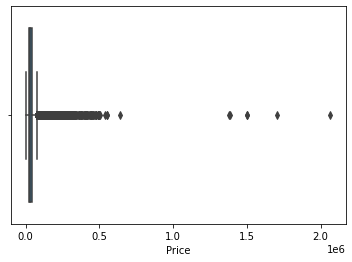

In [34]:
sns.boxplot(x=df['Price'])

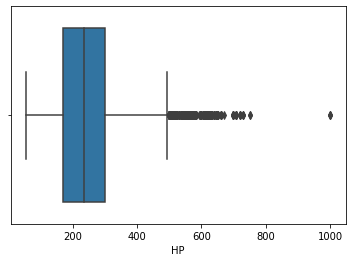

In [35]:
sns.boxplot(x=df['HP'])

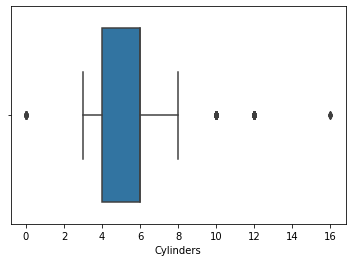

In [36]:
sns.boxplot(x=df['Cylinders'])

In [37]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=Q3-Q1
print(iqr)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [38]:
df=df[~((df<(Q1 - 1.5*iqr))| (df>(Q3+1.5*iqr))).any(axis=1)]
df.shape

(8546, 13)

# Step 6
Most represented Car brands and the average price amongst the top car brands

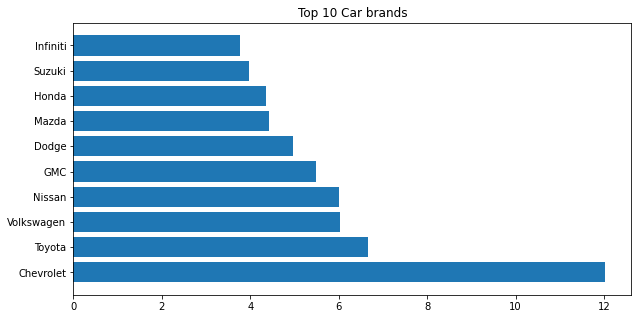

In [39]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
top_car_brands = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(top_car_brands, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [40]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# STEP 7 -

7.1 Correlation Matrix

In [41]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


Text(0.5, 1.0, 'Correlation between features')

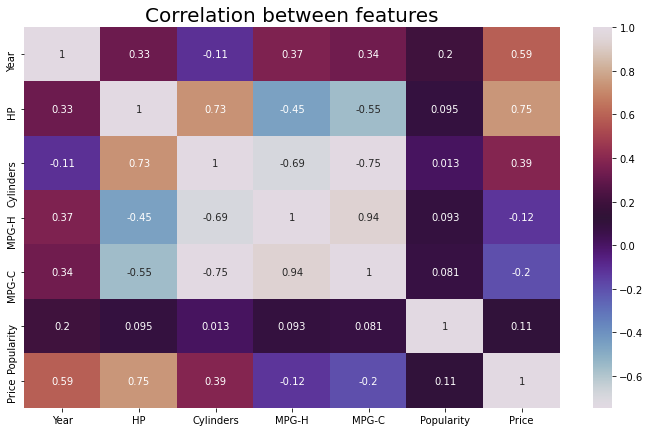

In [42]:
plt.figure(figsize=(12,7))
c=df.corr()
sns.heatmap(c,cmap="twilight" , annot=True)
plt.title("Correlation between features",fontsize=20)

# From the above heatmap , we can conclude that:


1.   Price gently depends upon features like HP, Year, Cylinders

2.   Also,the features HP, Cylinders are positively dependent i.e As HP increases , cylinders also increases.

3.  The features MPG-H and MPG-C have values -0.12 and -0.2 respectively i.e if no.of cylinders increases,MPG-H and MPG-C decreases.







7.2 Scatterplot

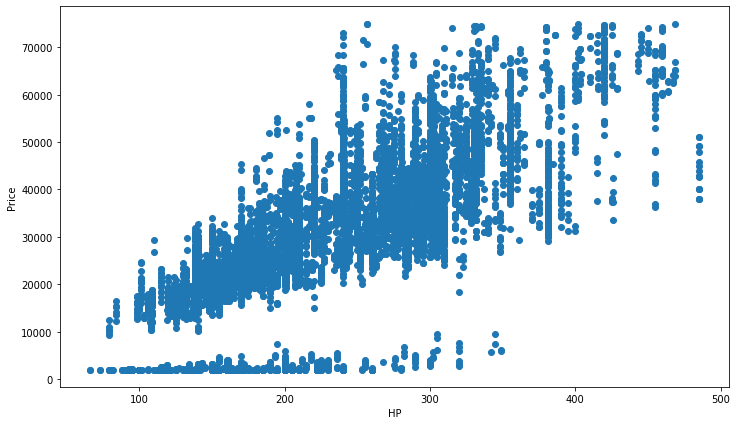

In [43]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# STEP 8 -

Plotting different graphs to see how other variables affect the price of the car



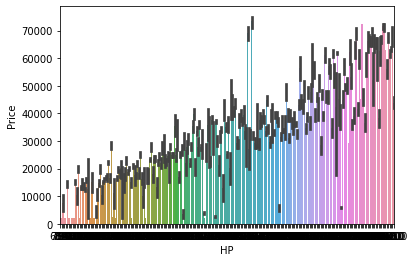

In [44]:
sns.barplot(df['HP'],df['Price'])

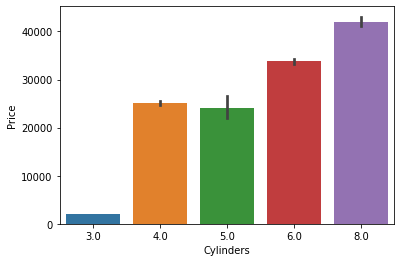

In [45]:
sns.barplot(df['Cylinders'],df['Price'])

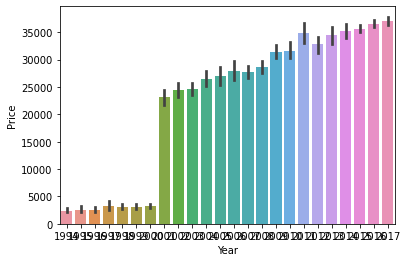

In [46]:
sns.barplot(df['Year'],df['Price'])

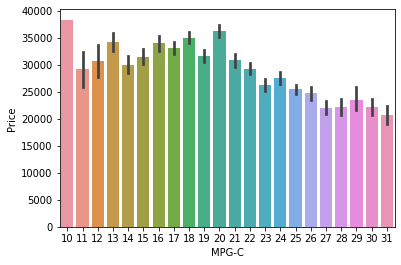

In [47]:
sns.barplot(df['MPG-C'],df['Price'])

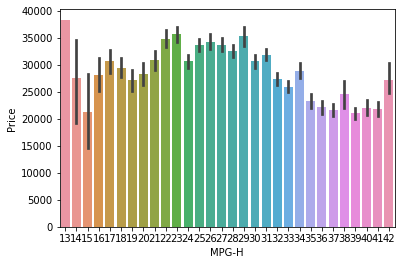

In [48]:
sns.barplot(df['MPG-H'],df['Price'])

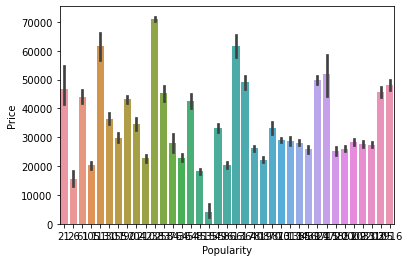

In [49]:
sns.barplot(df['Popularity'],df['Price'])

# From the above graphs we can conclude that
1. Car price increased after year 2000
2. More the no.of cylinders, more is the price of car
3. For MPG-C 10,price is maximum and for MPG-C 31 the price is minimum
4. For the MPG-H 13, the price is maximum and for MPG-H 15 the price is minimum.

MAKING A NEW GROUP "PRICE_GROUP"

In [50]:
# Create a new column 'Price_group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

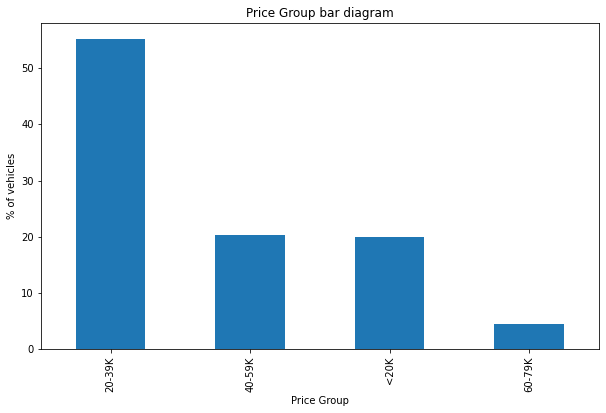

In [51]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

# STEP 9 -

Machine Learning Model


In [52]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [55]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

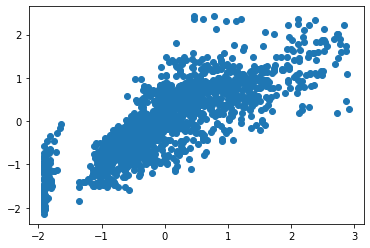

In [56]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

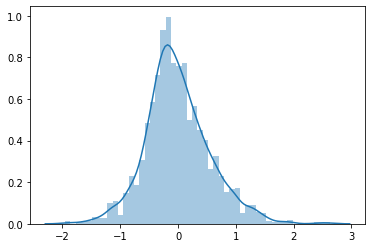

In [57]:
sns.distplot((y_test-y_pred),bins=50)

In [58]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


# STEP 10 -

Trying Different Algorithms and Checking their performance over matrics

In [59]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

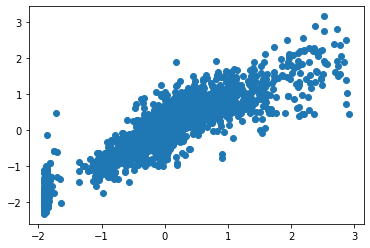

In [60]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

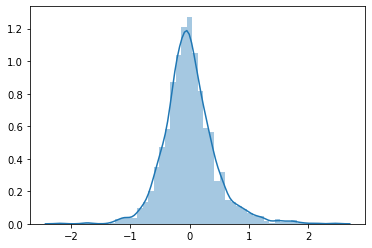

In [61]:
sns.distplot((y_test-y_pred),bins=50)

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


In [63]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

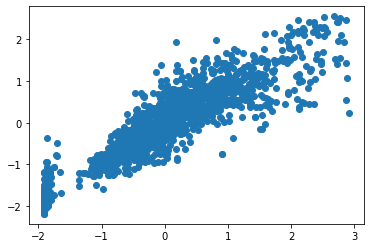

In [64]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

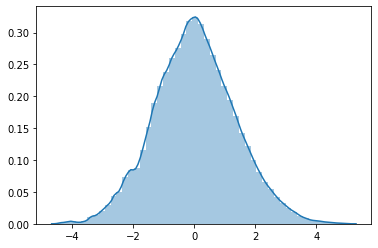

In [65]:
sns.distplot((y_test-y_pred),bins=50)

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


In [67]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

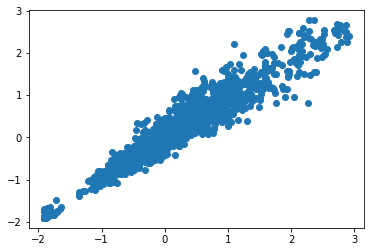

In [68]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

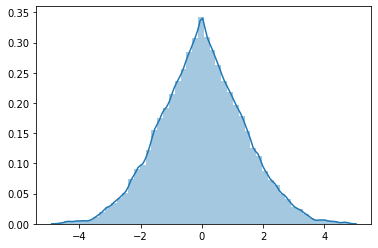

In [69]:
sns.distplot((y_test-y_pred),bins=50)

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332
